# Airline Passenger Statisfaction
-------

Data from [Kaggle](https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction)


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv").drop(["id","Unnamed: 0"], axis=1) #gs://harmon_mlprojects/water_potability.csv")

Categorical Features
- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)


Numerical (Continuous/Oridinal Features
- Age: The actual age of the passengers
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival

Target: 
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [3]:
train_df.columns = [col.replace(" ", "_") for col in train_df.columns]

In [4]:
train_df["satisfaction"].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

Will have to do something to deal with not applicable in Inflight Wifi:

In [5]:
train_df["Inflight_wifi_service"].value_counts()

3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight_wifi_service, dtype: int64

In [6]:
cat_feats = ["Gender","Customer_Type","Type_of_Travel","Class"]

In [7]:
num_feats = ["Departure_Delay_in_Minutes",
             "Age",
             "Arrival_Delay_in_Minutes",
             "Flight_Distance"]

In [8]:
ord_feats = [col for col in train_df.columns if col not in ["satisfaction","target"] 
                                             and col not in cat_feats
                                             and col not in num_feats]

In [9]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

labeler = LabelEncoder().fit(train_df["satisfaction"])
train_df["target"] = labeler.transform(train_df["satisfaction"])

In [10]:
labeler.inverse_transform([1])

array(['satisfied'], dtype=object)

In [11]:
labeler.inverse_transform([0])

array(['neutral or dissatisfied'], dtype=object)

Count number of nulls

In [12]:
train_df.isnull().sum(axis = 0)

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
target                                 0
dtype: int64

Class sizes

<AxesSubplot:title={'center':'Class Counts'}>

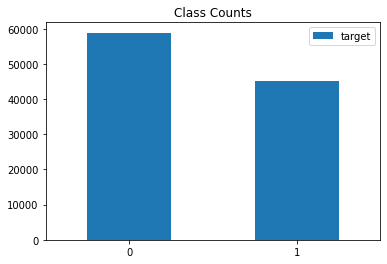

In [13]:
train_df["target"].value_counts().plot(kind="bar", title="Class Counts", legend=True,rot=0) 

Create long form of dataset to see distribution

In [14]:
train_df[num_feats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Departure_Delay_in_Minutes  103904 non-null  int64  
 1   Age                         103904 non-null  int64  
 2   Arrival_Delay_in_Minutes    103594 non-null  float64
 3   Flight_Distance             103904 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [15]:
long_num_df = train_df[num_feats + ["target"]].melt(id_vars="target")

In [16]:
long_ord_df = train_df[ord_feats + ["target"]].melt(id_vars="target")

In [17]:
long_cat_df = train_df[cat_feats + ["target"]].melt(id_vars="target",)

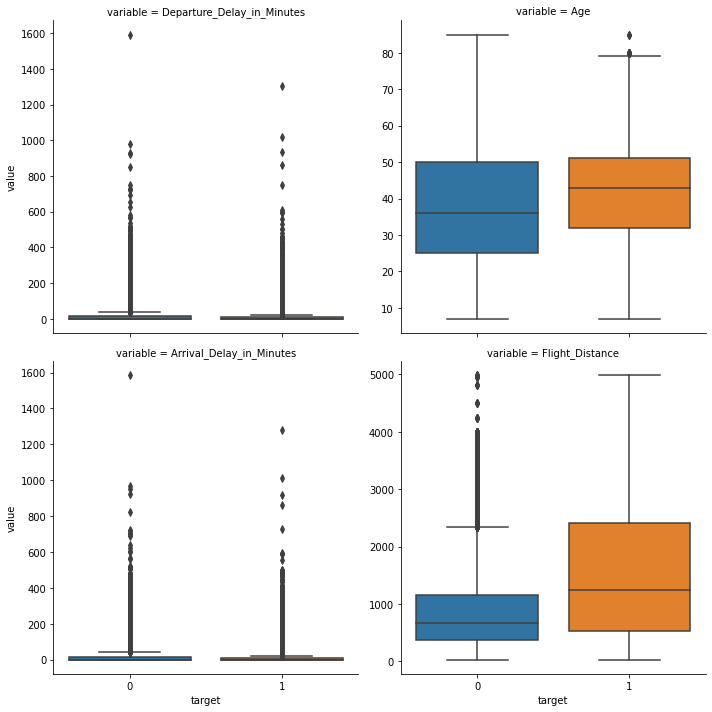

In [18]:
sns.catplot(
    data=long_num_df, x='target', y='value',
    col='variable', kind='box', col_wrap=2, 
    sharey=False
)

Some features have skew... meaning we should probably look to use median for imputing missing values over mean.

Look at scatter plot relationships

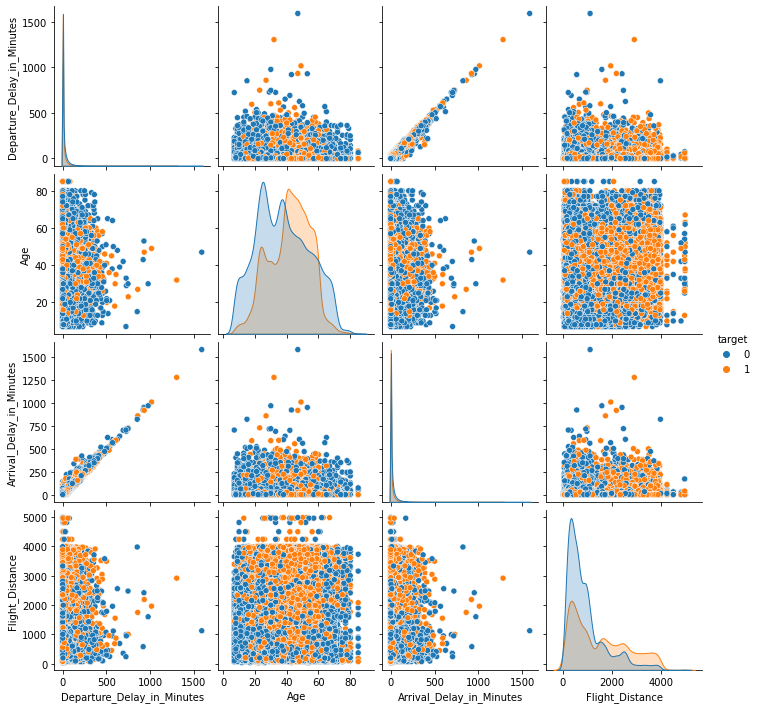

In [19]:
sns.pairplot(train_df[num_feats+["target"]],
             hue='target')

Pretty strong linear relationship with delay times.. can probably use linear regresssion to impute missing values or drop the one with missing values...

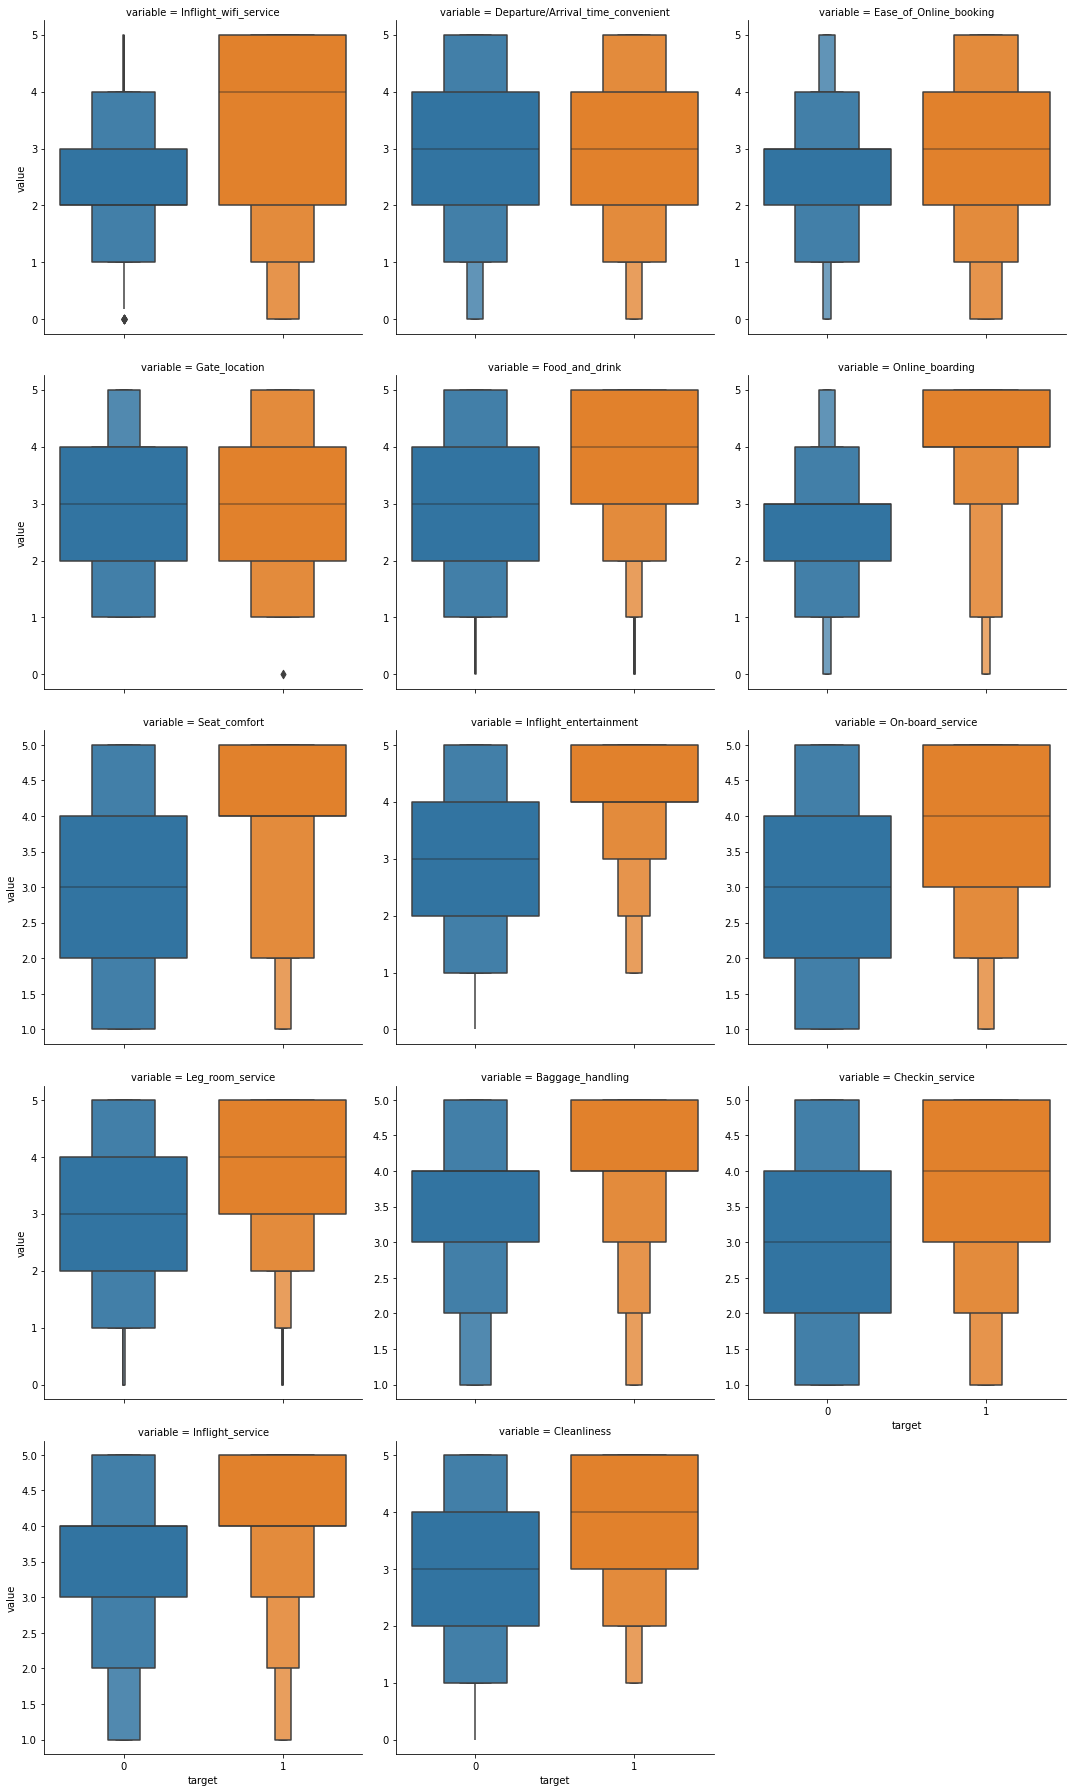

In [20]:
sns.catplot(
    data=long_ord_df, x='target', y='value',
    col='variable', kind='boxen', col_wrap=3, 
    sharey=False
)

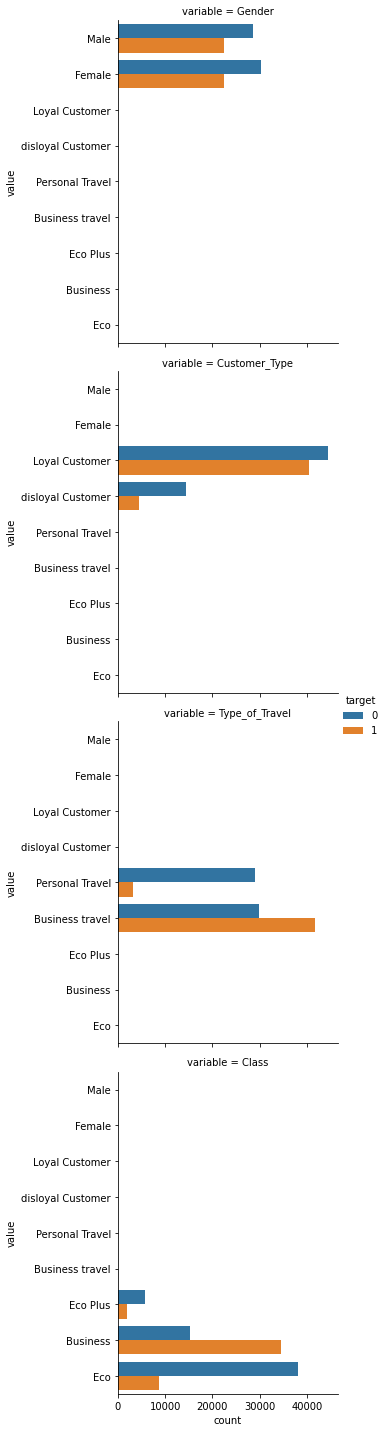

In [21]:
sns.catplot(
    data=long_cat_df, y='value', hue="target",
    row='variable', kind='count'
)

In [27]:
# g = sns.FacetGrid(long_cat_df, col="variable")
# g.map(sns.catplot, x="variable",kind="count",hue="target")

In [331]:
long_cat_df

,target,variable,value
0,0,Gender,Male
1,0,Gender,Male
2,1,Gender,Female
3,0,Gender,Female
4,1,Gender,Male
...,...,...,...
415611,0,Class,Eco
415612,1,Class,Business
415613,0,Class,Business
415614,0,Class,Eco


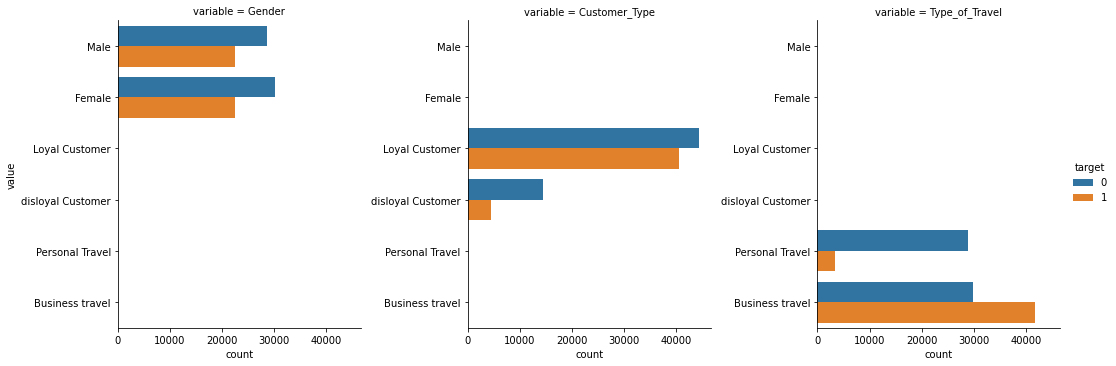

In [237]:
sns.catplot(
    data=long_cat_df, y='value', hue="target",
    col='variable', kind='count', col_wrap=3, 
    sharey=False
)

# sns.catplot(y="deck", hue="class", kind="count",
#             palette="pastel", edgecolor=".6",
#             data=titanic)

In [25]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



selector = make_pipeline(
            make_column_transformer((StandardScaler(),make_column_selector("Minutes"))),
            IterativeImputer(estimator=LinearRegression())
)

In [29]:
selector.fit_transform(train_df)

array([[ 0.26639265,  0.0729052 ],
       [-0.36137482, -0.23718437],
       [-0.3875318 , -0.39222916],
       ...,
       [-0.20443295, -0.03045799],
       [-0.3875318 , -0.39222916],
       [-0.3875318 , -0.39222916]])

In [30]:
import lightgbm as lgb
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
# from sklearn.metrics import 
from sklearn.model_selection import cross_validate

OSError: dlopen(/Users/mikeharmon/opt/miniconda3/envs/airline/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/mikeharmon/opt/miniconda3/envs/airline/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [109]:
class LRTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, num_feats, ord_feats, cat_feats):
        self.num_feats = [feat for feat in num_feats if "Minutes" not in feat]
        self.ord_feats = ord_feats
        self.cat_feats = cat_feats
        
        rest_scaler= ColumnTransformer(
                        transformers=[('stdscaler', StandardScaler(), self.num_feats + self.ord_feats),
                                      ('onehot',OneHotEncoder(drop='first'), self.cat_feats),
                                     ],
                        remainder="drop")
        
        min_scaler = make_pipeline(
                            make_column_transformer((StandardScaler(), make_column_selector("Minutes"))),
                            IterativeImputer(estimator=LinearRegression()))
        
        self.scaler = FeatureUnion(transformer_list=[("rest_scaler", rest_scaler),
                                                     ("min_scaler", min_scaler)])
        
    def fit(self, X, y=None):
        self.scaler = self.scaler.fit(X,y)
        
        return self
        
        
    def transform(self, X,y=None):
        return self.scaler.transform(X)
        

In [71]:
class LGBMTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, cat_feats):
        self.cat_feats = cat_feats

    def fit(self, X, y=None):
        return self
        
    def transform(self, X,y=None):
        for feat in cat_feats:
            X.loc[:,feat] = X.loc[:,feat].astype("category")
        return X
        

In [114]:
train_df.shape

(103904, 24)

In [110]:
X = train_df[num_feats + cat_feats + ord_feats]
y = train_df["target"]

In [111]:
lr_transf = LRTransformer(num_feats=num_feats, 
                          ord_feats=ord_feats,
                          cat_feats=cat_feats)

In [113]:
lr_transf.fit_transform(X,y).shape

(103904, 23)

In [107]:
lr_pipe = Pipeline(steps=[("lr_transf",LRTransformer(num_feats=num_feats, 
                                                      ord_feats=ord_feats,
                                                      cat_feats=cat_feats)),
                          ("log_rg", LogisticRegression())])

In [116]:
lr_model = lr_pipe.fit(X,y)

In [117]:
lr_model.predict(X)

array([0, 0, 1, ..., 0, 0, 0])

In [108]:
scores = cross_validate(lr_pipe, X, y, cv=5, scoring=('precision', 'recall', 'roc_auc'))

RuntimeError: Cannot clone object LRTransformer(cat_feats=['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'],
              num_feats=['Age', 'Flight_Distance'],
              ord_feats=['Inflight_wifi_service',
                         'Departure/Arrival_time_convenient',
                         'Ease_of_Online_booking', 'Gate_location',
                         'Food_and_drink', 'Online_boarding', 'Seat_comfort',
                         'Inflight_entertainment', 'On-board_service',
                         'Leg_room_service', 'Baggage_handling',
                         'Checkin_service', 'Inflight_service', 'Cleanliness']), as the constructor either does not set or modifies parameter num_feats

In [65]:
scores

{'fit_time': array([1.06335688, 1.03467703, 1.13018823, 1.04234195, 0.96581888]),
 'score_time': array([0.15945601, 0.21745586, 0.18291187, 0.14368296, 0.17562699]),
 'test_precision': array([0.87183082, 0.8714686 , 0.86793107, 0.86957025, 0.87107135]),
 'test_recall': array([0.83105023, 0.83138434, 0.8357461 , 0.83596882, 0.8457512 ]),
 'test_roc_auc': array([0.92685444, 0.92419513, 0.92377857, 0.92654227, 0.93231028])}

In [67]:
lgb_pipe = Pipeline(steps=[("lgb_transf",LGBMTransformer( cat_feats=cat_feats)),
                          ("lgb_model", lgb.LGBMClassifier())])

In [68]:
scores = cross_validate(lgb_pipe, X, y, cv=5, scoring=('precision', 'recall', 'roc_auc'))

/Users/mukeharmon/miniconda3/envs/greenbuildings/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/mukeharmon/miniconda3/envs/greenbuildings/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/mukeharmon/miniconda3/envs/greenbuildings/lib/python3.7/site-packages/ipykernel_launcher.py:11:

In [355]:
model = model.fit(X,y,categorical_feature=cat_feats)

/Users/mukeharmon/miniconda3/envs/greenbuildings/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


/Users/mukeharmon/miniconda3/envs/greenbuildings/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mukeharmon/miniconda3/envs/greenbuildings/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mukeharmon/miniconda3/envs/greenbuildings/lib/python3.7/site-packages/lightgbm/sklearn.py", line 857, in fit
    callbacks=callbacks, init_model=init_model)
  File "/Users/mukeharmon/miniconda3/envs/greenbuildings/lib/python3.7/site-packages/lightgbm/sklearn.py", line 617, in fit
    callbacks=callbacks, init_model=init_model)
  File "/Users/mukeharmon/miniconda3/envs/greenbuildings/lib/python3.7/site-packages/lightgbm/engine.py", line 252, in train
    booster.update(fobj=fobj)
  File "/Us

In [364]:
scores

{'fit_time': array([0.45551395, 0.43435001, 0.46153593, 0.54887486, 1.16847706]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.32187295]),
 'test_precision': array([       nan,        nan,        nan,        nan, 0.97720732]),
 'test_recall': array([      nan,       nan,       nan,       nan, 0.9426985]),
 'test_roc_auc': array([       nan,        nan,        nan,        nan, 0.99521091])}